# 270F Final Project: Water Conservation Supplier Compliance


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
df = pd.read_csv('supplier_compliance.csv', skipinitialspace=True)

In [2]:
df.iloc[:,[2,3,5,6,7,8,10,11]] = df.iloc[:,[2,3,5,6,7,8,10,11]].replace('%','',regex=True).apply(pd.to_numeric)/100
df.iloc[:,13] = df.iloc[:,13].replace(',','',regex=True).apply(pd.to_numeric)
df.dtypes

Supplier Name                                                                         object
Hydrologic Region                                                                     object
State-mandated Conservation Standard - Previous (3/1/2016)                           float64
State-mandated Conservation Standard - Current (Effective 6/1/2016)                  float64
Did Supplier Self-certify?                                                            object
Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016    float64
June 2016 to Aug 2016 Self-certified?                                                float64
Applicable Cumulative Savings by Supplier (as compared to 2013)                      float64
Missed Conservation Standard By                                                      float64
Order Status                                                                          object
Monthly Savings (as compared to 2013) - Aug 2015                      

In [3]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Supplier Name,389,389,California Water Service Company Los Altos/Sub...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hydrologic Region,389,10,South Coast,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State-mandated Conservation Standard - Previous (3/1/2016),389,NaN,NaN,NaN,0.217609,0.0796072,0.04,0.16,0.22,0.28,0.36
State-mandated Conservation Standard - Current (Effective 6/1/2016),389,NaN,NaN,NaN,0.0231362,0.0638614,0,0,0,0,0.34
Did Supplier Self-certify?,389,2,Yes,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,389,NaN,NaN,NaN,0.242018,0.0684349,0.046,0.199,0.239,0.281,0.484
June 2016 to Aug 2016 Self-certified?,389,NaN,NaN,NaN,0.202856,0.0712076,-0.103,0.159,0.201,0.241,0.479
Applicable Cumulative Savings by Supplier (as compared to 2013),389,NaN,NaN,NaN,0.20482,0.0708853,-0.029,0.16,0.203,0.243,0.481
Missed Conservation Standard By,389,NaN,NaN,NaN,-0.181684,0.0822554,-0.479,-0.227,-0.188,-0.144,0.149
Order Status,7,2,A,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120
1,Yucaipa Valley Water District,South Coast,0.34,0.20,Yes,0.183,0.071,0.071,0.129,NaN,0.264,0.119,260.0,45018
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076


In [5]:
#Correlation Table
corr = df.corr()
corr

,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
State-mandated Conservation Standard - Previous (3/1/2016),1.000000,0.119652,0.487124,0.284381,0.289372,-0.156477,0.416825,0.169345,0.751668,-0.135968
State-mandated Conservation Standard - Current (Effective 6/1/2016),0.119652,1.000000,0.146387,0.168168,0.258134,0.553928,0.104832,0.177243,0.104855,-0.071906
Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,0.487124,0.146387,1.000000,0.840911,0.851498,-0.620144,0.810566,0.658547,0.428711,-0.111819
June 2016 to Aug 2016 Self-certified?,0.284381,0.168168,0.840911,1.000000,0.974463,-0.709202,0.614935,0.834198,0.156028,-0.075887
Applicable Cumulative Savings by Supplier (as compared to 2013),0.289372,0.258134,0.851498,0.974463,1.000000,-0.661361,0.629863,0.793444,0.184813,-0.084115
Missed Conservation Standard By,-0.156477,0.553928,-0.620144,-0.709202,-0.661361,1.000000,-0.461408,-0.546159,-0.077859,0.016662
Monthly Savings (as compared to 2013) - Aug 2015,0.416825,0.104832,0.810566,0.614935,0.629863,-0.461408,1.000000,0.585345,0.396457,-0.076487
Monthly Savings (as compared to 2013) - Aug 2016,0.169345,0.177243,0.658547,0.834198,0.793444,-0.546159,0.585345,1.000000,0.023549,-0.043824
Estimated Aug 2016 Monthly R-GPCD,0.751668,0.104855,0.428711,0.156028,0.184813,-0.077859,0.396457,0.023549,1.000000,-0.106280
Total Population Served,-0.135968,-0.071906,-0.111819,-0.075887,-0.084115,0.016662,-0.076487,-0.043824,-0.106280,1.000000


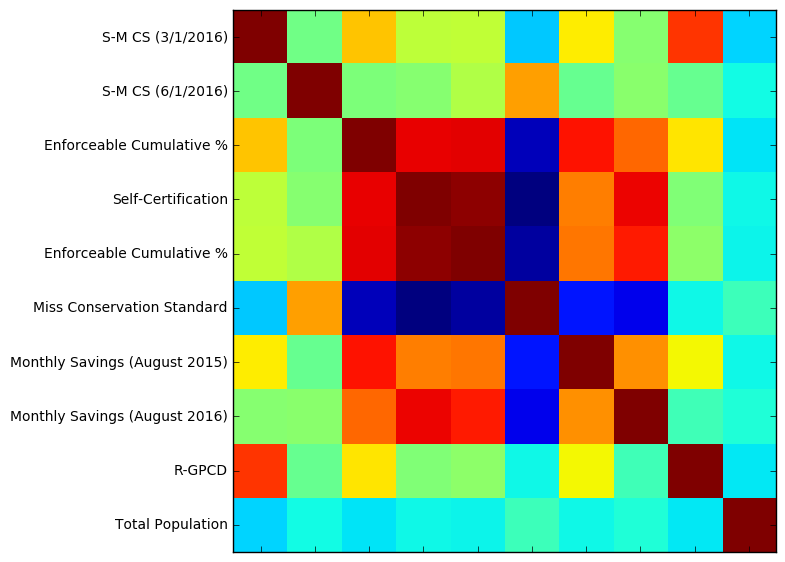

In [6]:
#Plot Correlation Matrix
size=7
names = ['S-M CS (3/1/2016)', 'S-M CS (6/1/2016)', 'Enforceable Cumulative %', 'Self-Certification', 'Enforceable Cumulative %', 'Miss Conservation Standard', 'Monthly Savings (August 2015)', 'Monthly Savings (August 2016)', 'R-GPCD', 'Total Population']
corr = df.corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);
ax.set_xticklabels([])
ax.set_yticklabels(names)
plt.show()

In [7]:
df['Type'] = df['Missed Conservation Standard By'].map(lambda x: 0 if x > 0 else 1) # 0= Fail, 1= Pass
df.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served,Type
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120,0
1,Yucaipa Valley Water District,South Coast,0.34,0.20,Yes,0.183,0.071,0.071,0.129,NaN,0.264,0.119,260.0,45018,0
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664,0
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023,0
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076,0


In [8]:
#Define training and test sets
split = np.random.rand(len(df)) < 0.75
train = df[split]
test = df[~split]

In [9]:
#Call Gaussian Naive Bayesian class with default parameters
clf = GaussianNB()

#Train model
clf.fit(train.iloc[:,13:14], train['Type'])

#Prediction
prediction= clf.predict(test.iloc[:,13:14])
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
#Accuracy, F1 Score, Recall, and Precision Scores
print("Accuracy:", accuracy_score(test['Type'], prediction))
print("F1 Score:", f1_score(test['Type'], prediction, average= 'binary'))
print("Recall Score:", recall_score(test['Type'], prediction))
print("Precision Score:", precision_score(test['Type'], prediction))

Accuracy: 0.934065934066
F1 Score: 0.965909090909
Recall Score: 1.0
Precision Score: 0.934065934066


In [11]:
#Filtering out "Self-Certified" data
df2 = df.loc[df['Did Supplier Self-certify?'] != 'Yes']
df2.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served,Type
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120,0
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664,0
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023,0
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076,0
6,Bakman Water Company,Tulare Lake,0.34,0.34,No,0.307,0.343,0.307,0.033,NaN,0.361,0.359,192.5,16756,0


In [12]:
# define training and test sets
split2 = np.random.rand(len(df2)) < 0.75
train2 = df2[split2]
test2 = df2[~split2]
#train2.groupby('Type').count()

In [13]:
# call Gaussian Naive Bayesian class with default parameters
clf2 = GaussianNB()

# train model
clf2.fit(train2.iloc[:,13:14], train2['Type'])

#Prediction
prediction2= clf2.predict(test2.iloc[:,13:14])
print(prediction2)

[0 1 1 1 0 0 0 1]


In [14]:
#Accuracy, F1 Score, Recall, and Precision Scores
print("Accuracy:", accuracy_score(test2['Type'], prediction2))
print("F1 Score:", f1_score(test2['Type'], prediction2, average= 'binary'))
print("Recall Score:", recall_score(test2['Type'], prediction2))
print("Precision Score:", precision_score(test2['Type'], prediction2))

Accuracy: 0.625
F1 Score: 0.727272727273
Recall Score: 0.571428571429
Precision Score: 1.0
